In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from cm import plot_confusion_matrix

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
cancer_costs_df = pd.read_csv('../data/mmd_cancer_data.csv')
cancer_costs_df = cancer_costs_df.rename(columns = {'analysis_value': 'cancer_avg_cost'})

In [3]:
cancer_costs_df.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,cancer_avg_cost
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,19293
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,17151
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,19469
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,17234
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,20317


In [4]:
cancer_costs_df = cancer_costs_df[['state', 'county', 'urban', 'cancer_avg_cost']]
cancer_costs_df.head()

,state,county,urban,cancer_avg_cost
0,ALABAMA,Autauga County,Urban,19293
1,ALABAMA,Baldwin County,Rural,17151
2,ALABAMA,Barbour County,Rural,19469
3,ALABAMA,Bibb County,Urban,17234
4,ALABAMA,Blount County,Urban,20317


In [5]:
state_abbrev = pd.read_csv('../data/state_abbrev.csv')
state_abbrev.head()
state_abbrev.set_index('name')['abbrev'].to_dict()

{'ALABAMA': 'AL',
 'ALASKA': 'AK',
 'ARIZONA': 'AZ',
 'ARKANSAS': 'AR',
 'CALIFORNIA': 'CA',
 'COLORADO': 'CO',
 'CONNECTICUT': 'CT',
 'DELAWARE': 'DE',
 'DISTRICT OF COLUMBIA': 'DC',
 'FLORIDA': 'FL',
 'GEORGIA': 'GA',
 'HAWAII': 'HI',
 'IDAHO': 'ID',
 'ILLINOIS': 'IL',
 'INDIANA': 'IN',
 'IOWA': 'IA',
 'KANSAS': 'KS',
 'KENTUCKY': 'KY',
 'LOUISIANA': 'LA',
 'MAINE': 'ME',
 'MARYLAND': 'MD',
 'MASSACHUSETTS': 'MA',
 'MICHIGAN': 'MI',
 'MINNESOTA': 'MN',
 'MISSISSIPPI': 'MS',
 'MISSOURI': 'MO',
 'MONTANA': 'MT',
 'NEBRASKA': 'NE',
 'NEVADA': 'NV',
 'NEW HAMPSHIRE': 'NH',
 'NEW JERSEY': 'NJ',
 'NEW MEXICO': 'NM',
 'NEW YORK': 'NY',
 'NORTH CAROLINA': 'NC',
 'NORTH DAKOTA': 'ND',
 'OHIO': 'OH',
 'OKLAHOMA': 'OK',
 'OREGON': 'OR',
 'PENNSYLVANIA': 'PA',
 'RHODE ISLAND': 'RI',
 'SOUTH CAROLINA': 'SC',
 'SOUTH DAKOTA': 'SD',
 'TENNESSEE': 'TN',
 'TEXAS': 'TX',
 'UTAH': 'UT',
 'VERMONT': 'VT',
 'VIRGINIA': 'VA',
 'WASHINGTON': 'WA',
 'WEST VIRGINIA': 'WV',
 'WISCONSIN': 'WI',
 'WYOMING': 'WY

In [6]:
cancer_costs_df['state'] = cancer_costs_df['state'].map(state_abbrev.set_index('name')['abbrev'].to_dict())
cancer_costs_df.head()

,state,county,urban,cancer_avg_cost
0,AL,Autauga County,Urban,19293
1,AL,Baldwin County,Rural,17151
2,AL,Barbour County,Rural,19469
3,AL,Bibb County,Urban,17234
4,AL,Blount County,Urban,20317


In [7]:
income_df = pd.read_csv('../data/irs_county_2016.csv')
income_df = income_df[['STATE', 'COUNTYNAME', 'N02650', 'A02650']]
income_df.columns = ['state', 'county', 'returns_with_total_inc','total_inc_amt']
income_df.head()

,state,county,returns_with_total_inc,total_inc_amt
0,AL,Alabama,19140,-1657452
1,AL,Alabama,285760,1632624
2,AL,Alabama,529780,9158151
3,AL,Alabama,495750,18016190
4,AL,Alabama,263130,16321828


In [8]:
income_agg = income_df.groupby(['state','county']).agg('sum').reset_index()
income_agg['avg_income'] = round(income_agg.total_inc_amt * 1000 / income_agg.returns_with_total_inc, 0)
income_agg = income_agg[['state','county', 'avg_income']]
income_agg.head()

,state,county,avg_income
0,AK,Alaska,68636.0
1,AK,Aleutians East Borou,48984.0
2,AK,Aleutians West Censu,60696.0
3,AK,Anchorage Municipali,76594.0
4,AK,Bethel Census Area,37840.0


In [9]:
tn_cancer_costs = cancer_costs_df.loc[cancer_costs_df['state'] == 'TN']

In [10]:
tn_cancer_costs.head()

,state,county,urban,cancer_avg_cost
2396,TN,Anderson County,Urban,15454
2397,TN,Bedford County,Rural,19219
2398,TN,Benton County,Rural,21315
2399,TN,Bledsoe County,Rural,19250
2400,TN,Blount County,Urban,17073


In [11]:
tn_cancer_costs.shape

(95, 4)

In [12]:
tn_income_agg = income_agg.loc[income_agg['state'] == 'TN']

In [13]:
tn_income_agg.head()

,state,county,avg_income
2468,TN,Anderson County,53617.0
2469,TN,Bedford County,47308.0
2470,TN,Benton County,41485.0
2471,TN,Bledsoe County,39919.0
2472,TN,Blount County,56978.0


In [14]:
tn_income_agg.shape

(96, 3)

In [15]:
total_df = pd.merge(tn_cancer_costs, tn_income_agg, on = ['county'], how = 'inner')

In [17]:
total_df.head()

,state_x,county,urban,cancer_avg_cost,state_y,avg_income
0,TN,Anderson County,Urban,15454,TN,53617.0
1,TN,Bedford County,Rural,19219,TN,47308.0
2,TN,Benton County,Rural,21315,TN,41485.0
3,TN,Bledsoe County,Rural,19250,TN,39919.0
4,TN,Blount County,Urban,17073,TN,56978.0


In [16]:
total_df.shape

(95, 6)

In [18]:
total_df = total_df[['state_x', 'county', 'urban', 'cancer_avg_cost', 'avg_income']]

In [19]:
total_df.head()

,state_x,county,urban,cancer_avg_cost,avg_income
0,TN,Anderson County,Urban,15454,53617.0
1,TN,Bedford County,Rural,19219,47308.0
2,TN,Benton County,Rural,21315,41485.0
3,TN,Bledsoe County,Rural,19250,39919.0
4,TN,Blount County,Urban,17073,56978.0


In [20]:
total_df.shape

(95, 5)

In [21]:
total_df.columns = ['state', 'county', "urban", 'cancer_avg_cost', 'avg_income']

In [22]:
total_df.head()

,state,county,urban,cancer_avg_cost,avg_income
0,TN,Anderson County,Urban,15454,53617.0
1,TN,Bedford County,Rural,19219,47308.0
2,TN,Benton County,Rural,21315,41485.0
3,TN,Bledsoe County,Rural,19250,39919.0
4,TN,Blount County,Urban,17073,56978.0


In [23]:
total_df['cancer_cost_ratio'] = total_df['cancer_avg_cost'] / total_df['avg_income']

In [24]:
total_df.head()

,state,county,urban,cancer_avg_cost,avg_income,cancer_cost_ratio
0,TN,Anderson County,Urban,15454,53617.0,0.288229
1,TN,Bedford County,Rural,19219,47308.0,0.406253
2,TN,Benton County,Rural,21315,41485.0,0.513800
3,TN,Bledsoe County,Rural,19250,39919.0,0.482227
4,TN,Blount County,Urban,17073,56978.0,0.299642


In [25]:
avg_cancer_ratio = total_df.cancer_cost_ratio.mean()
avg_cancer_ratio

0.4304969465069908

In [26]:
total_df['above_avg_cancer_ratio'] = total_df['cancer_cost_ratio'] > avg_cancer_ratio

In [27]:
total_df.head()

,state,county,urban,cancer_avg_cost,avg_income,cancer_cost_ratio,above_avg_cancer_ratio
0,TN,Anderson County,Urban,15454,53617.0,0.288229,False
1,TN,Bedford County,Rural,19219,47308.0,0.406253,False
2,TN,Benton County,Rural,21315,41485.0,0.513800,True
3,TN,Bledsoe County,Rural,19250,39919.0,0.482227,True
4,TN,Blount County,Urban,17073,56978.0,0.299642,False


In [28]:
total_df = pd.get_dummies(total_df, columns = ['urban'], drop_first = True)
total_df.head()

,state,county,cancer_avg_cost,avg_income,cancer_cost_ratio,above_avg_cancer_ratio,urban_Urban
0,TN,Anderson County,15454,53617.0,0.288229,False,1
1,TN,Bedford County,19219,47308.0,0.406253,False,0
2,TN,Benton County,21315,41485.0,0.513800,True,0
3,TN,Bledsoe County,19250,39919.0,0.482227,True,0
4,TN,Blount County,17073,56978.0,0.299642,False,1


In [43]:
total_df.shape

(95, 7)

In [55]:
final_df = total_df.drop(columns = ['state', 'county', 'cancer_avg_cost', 'avg_income'])

In [56]:
final_df.head()

,cancer_cost_ratio,above_avg_cancer_ratio,urban_Urban
0,0.288229,False,1
1,0.406253,False,0
2,0.513800,True,0
3,0.482227,True,0
4,0.299642,False,1


In [57]:
X = final_df.drop(columns = 'above_avg_cancer_ratio')

In [58]:
Y = final_df.above_avg_cancer_ratio

In [79]:
X.shape
X.head()

,cancer_cost_ratio,urban_Urban
0,0.288229,1
1,0.406253,0
2,0.513800,0
3,0.482227,0
4,0.299642,1


In [80]:
Y.shape
Y.head()

0    False
1    False
2     True
3     True
4    False
Name: above_avg_cancer_ratio, dtype: bool

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 41)

In [82]:
print(X_train)

    cancer_cost_ratio  urban_Urban
79           0.345875            1
7            0.399894            1
62           0.426669            1
11           0.539555            1
16           0.416308            0
..                ...          ...
65           0.486786            0
80           0.612822            1
12           0.483616            0
35           0.506649            0
64           0.396359            0

[71 rows x 2 columns]


In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#import graphviz
from IPython.display import SVG

In [84]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [85]:
Y_pred_train = tree.predict(X_train)
print(metrics.accuracy_score(Y_train, Y_pred_train))

1.0


In [86]:
Y_pred = tree.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))

1.0


In [87]:
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)

RandomForestClassifier()

In [88]:
Y_pred_train = forest.predict(X_train)
print(metrics.accuracy_score(Y_train, Y_pred_train))

1.0


In [89]:
Y_pred = forest.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))

1.0


In [90]:
forest = RandomForestClassifier(n_estimators = 1000, max_depth = 5, min_samples_leaf = 5)
forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=1000)

In [91]:
Y_pred_train = forest.predict(X_train)
print(metrics.accuracy_score(Y_train, Y_pred_train))

1.0


In [92]:
Y_pred = forest.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))

1.0


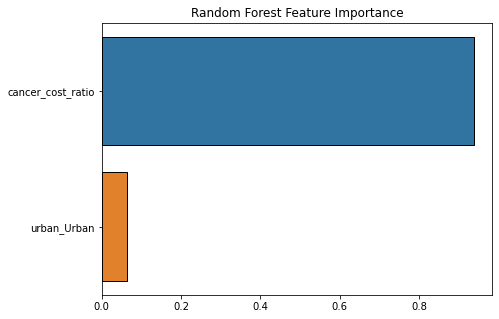

In [78]:
fig, ax = plt.subplots(figsize = (7,5))
sns.barplot(x = forest.feature_importances_, y = list(X.columns), ax = ax, edgecolor = 'black')
plt.title('Random Forest Feature Importance');